# Linear Regression: Moneyball
## A statistical case study of the popular sports story

Overview
One of the most compelling stories of sports analytics made popular by the 2011 movie Moneyball, the Oakland Athletics team of 2002 created history by winning 20 consecutive games between August 13 and September 2002.

Much of the Oakland Athletics (popularly referred to as the A’s) success in that season is attributed to their General Manager, Billy Beane and former Assistant General Manager, Paul DePodesta.

DePodesta, a graduate in Economics from Harvard University joined the A’s in 1999 and quickly started incorporating analysis of baseball statistics to value and purchase players.(Sabermetrics)

This approach came into the limelight following the historical 2002 season when Billy Beane purchased vastly undervalued players to supplant the departure of key players prior to the start of the season. Due to severe budgetary constraints of the Oakland Athletics, Billy resorted to the methods being researched by DePodesta in order to purchase underrated players to meet the California based team’s payroll.

s



This code attempts to recreate portions of Paul DePodesta’s analysis in order to demonstrate the power of the simplest supervised learning technique a.k.a Linear Regression.

This analysis is very similar to the case study in MIT’s Analytics Edge

Linear regression equation:

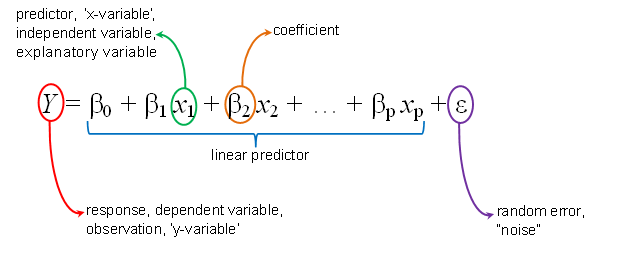


Dataset: https://www.kaggle.com/wduckett/moneyball-mlb-stats-19622012/data

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("/Users/swaruptripathy/Desktop/Data Science/baseball.csv")
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


Here:
RA stands for runs allowed.
RS stand for runs scored.
OBP stands for On Base Percentage.
SLG stand for Slugging Percentage.
BA is Batting Average.
OOBP is opponent’s OBP.
OSLG is opponent’s SLG.
W stands for number of wins in that season.
A new variable RD is added as the difference between RS and RA.

Additionally, we shall only keep records with Year < 2002 in order to replicate the data prior to the 2002 season.
We will use plots in order to find insights regarding the distributions of the numerical variables.

In [25]:
len(df.columns)
len(df)

1232

In [26]:
df.loc[:,'RD'] = df.RS - df.RA
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,100
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,7
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,-72
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,-146


In [27]:
moneyball = df.loc[df['Year']<2002]
moneyball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27


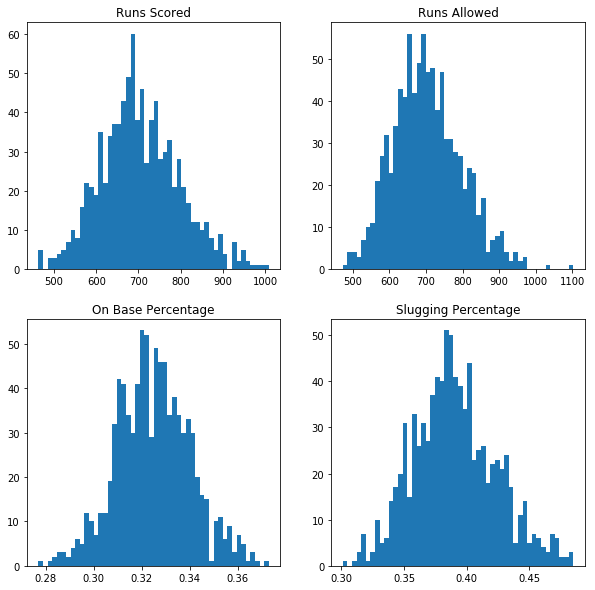

In [28]:
f, ax = plt.subplots(2,2)
ax[0,0].hist(moneyball.RS,bins = 50)
ax[0,0].set_title("Runs Scored")
ax[0,1].hist(moneyball.RA,bins = 50)
ax[0,1].set_title("Runs Allowed")
ax[1,0].hist(moneyball.OBP,bins = 50)
ax[1,0].set_title("On Base Percentage")
ax[1,1].hist(moneyball.SLG,bins = 50)
ax[1,1].set_title("Slugging Percentage")
f.subplots_adjust(hspace=0.2)
f.set_figheight(10)
f.set_figwidth(10)

Observe that all four features(variables) are approximately normally distributed. Both, the runs scored and runs allowed graph seems to be skewed slightly towards the left. The tails of the runs scored graph seems to be thicker than that of the runs allowed graph.

https://www.youtube.com/watch?v=KWPhV6PUr9o&t=85s

According to DePodesta’s character in the clip, the A’s required at least 99 wins in order to make the playoffs in 2002. Lets try to visualise this insight.

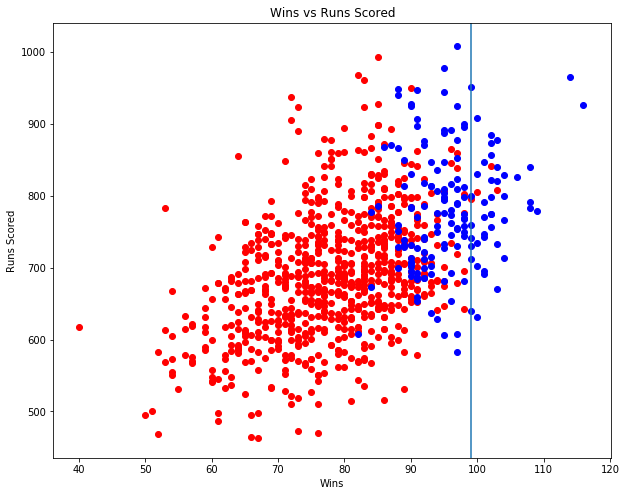

In [29]:
# Subsetting teams qualified for playoffs
moneyball1 = moneyball.loc[moneyball['Playoffs']==1]
moneyball0 = moneyball.loc[moneyball['Playoffs']==0]
# Plotting scatterplot
plt.figure(figsize=(10,8))
plt.scatter(x=moneyball0.W,y = moneyball0.RS,c="red")
plt.scatter(x=moneyball1.W,y = moneyball1.RS,c="blue")
plt.title("Wins vs Runs Scored")
plt.xlabel("Wins")
plt.ylabel("Runs Scored")
plt.axvline(x = 99)

From the above plot we see that DePodesta’s estimate of 99 wins makes sense since there appears to be only 3 observations (red) who haven’t made it to the playoffs with ≥ 99 wins.

DePodesta also calculated that the A’s need to score atleast 814 runs and allow only 645 runs in order to make it to the postseason. That meant that the difference between runs scored and runs allowed needed to be approximately 169(RD). Let us look at the relationship between RD and Wins.

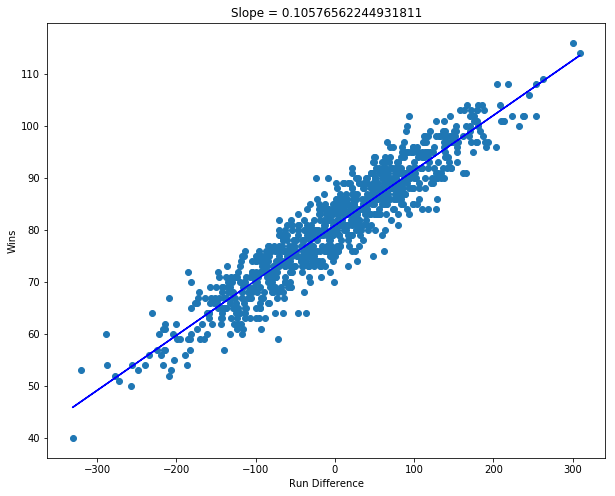

In [30]:
x = np.array(moneyball.RD)
y = np.array(moneyball.W)
# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]
#Plotting the figure
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Run Difference")
plt.ylabel("Wins")
plt.show()

In [31]:
# We can clearly see that the relationship between the two variables is linear.
print(np.corrcoef(x,y))

[[1.         0.93851498]
 [0.93851498 1.        ]]


Additionally, there is a strong and positive correlation of 0.9385 between RD and number of wins.

Thus, our exploratory data analysis confirms that DePodesta’s estimates have been spot on so far. 

Now in the study we shall build regression models to further validate DePodesta’s analysis. we will study relationships between the numerical variables and build a few models to predict the Oakland A’s run in 2002.

Now let us look at the formulas for calculating some of the numerical terms that may seem obscure to most people.

## On Base Percentage:

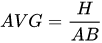

Formula for calculating On-base Percentage. Source
H : Hits

B: Base on balls (Walks)

HBP: Hits by pitch

AB: At bat

SF: Sacrifice fly


## Slugging Percentage:

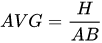


Formula for calculating Slugging percentage. Source
1B, 2B, 3B: singles, doubles, triples

HR: Home Run

AB: At bat



## Batting Average:

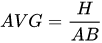

Formula for calculating Batting average. Source
H: Hits

AB: At bat


We can see that all three of the statistics previously discussed contribute in some way to the number of runs scored by the team. We won’t go into specific details of explaining each variable involved. All we need to know is that OBP, SLG and AVG are strong indicators of runs scored by the particular team.

Let us validate these assumptions by plotting the relationship between each of these variables with RS(Runs scored):


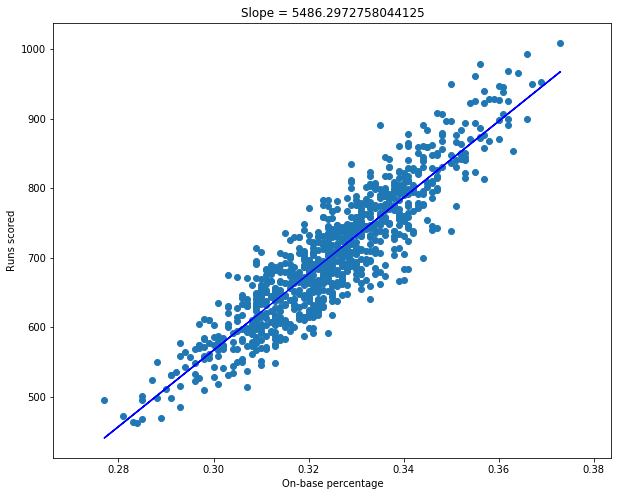

In [32]:
x = np.array(moneyball.OBP)
y = np.array(moneyball.RS)

# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]

#Plotting the figure
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("On-base percentage")
plt.ylabel("Runs scored")
plt.show()

In [33]:
print(np.corrcoef(moneyball.OBP,moneyball.RS))

[[1.         0.90490915]
 [0.90490915 1.        ]]


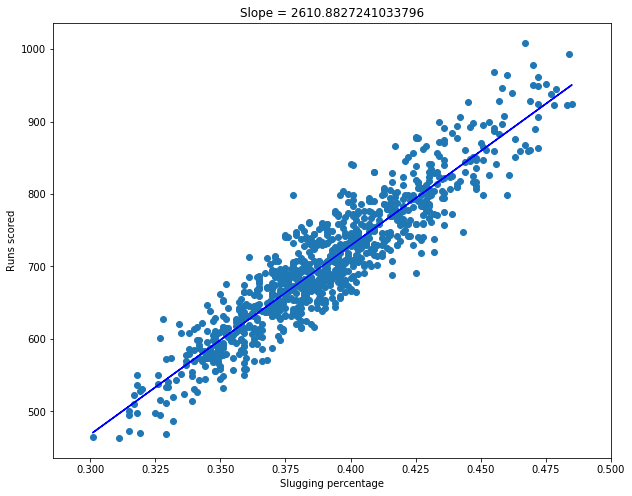

In [34]:
x = np.array(moneyball.SLG)
y = np.array(moneyball.RS)

# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]

#Plotting the figure
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Slugging percentage")
plt.ylabel("Runs scored")
plt.show()

In [35]:
print(np.corrcoef(moneyball.SLG,moneyball.RS))

[[1.         0.92638433]
 [0.92638433 1.        ]]


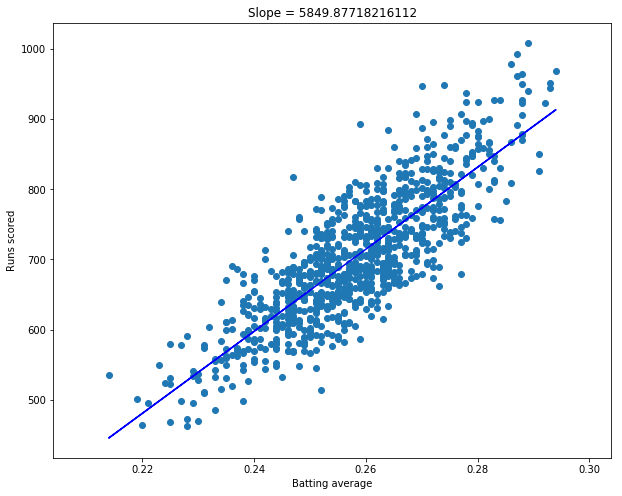

In [36]:
x = np.array(moneyball.BA)
y = np.array(moneyball.RS)

# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]

#Plotting the figure
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Batting average")
plt.ylabel("Runs scored")
plt.show()

In [37]:
print(np.corrcoef(moneyball.BA,moneyball.RS))

[[1.         0.83162475]
 [0.83162475 1.        ]]


There is a clear linear relationship between each of the variables and runs scored.

As a rule of thumb, correlation above 0.7 is considered as strong positive correlation. All of our variables satisfy this rule.

Similarly, we can hypothesise that OOBP(Opponent’s OBP) and OSLG(Opponent’s SLG) have a similar relationship with RA(Runs allowed).

Before we see the relationship between these variables and RA, I noticed that there are a few missing values in the OOBP and OSLG columns. We have to remove these rows of observations in order to plot a proper relationship.

In [38]:
moneyball.isnull().sum()
moneyball.drop(['RankSeason','RankPlayoffs'],axis = 1,inplace = True)

/Users/swaruptripathy/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [39]:
moneyballnew = moneyball.dropna()
moneyballnew.head(5)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,161,0.329,0.393,27


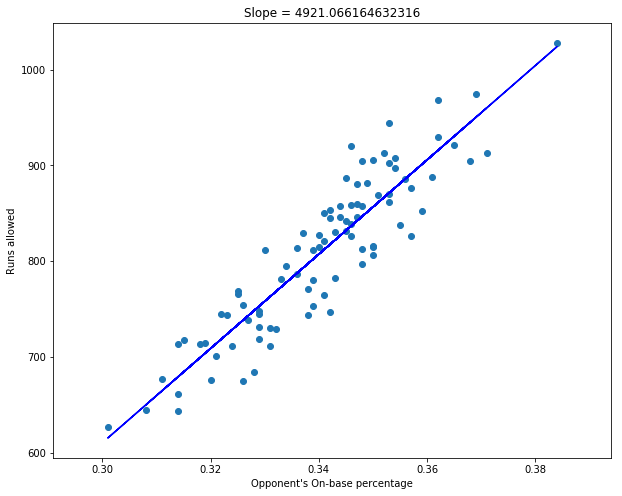

In [40]:
x = np.array(moneyballnew.OOBP)
y = np.array(moneyballnew.RA)

# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]

#Plotting the figure
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Opponent's On-base percentage")
plt.ylabel("Runs allowed")
plt.show()

In [41]:
print(np.corrcoef(moneyballnew.OOBP,moneyballnew.RA))

[[1.         0.90990783]
 [0.90990783 1.        ]]


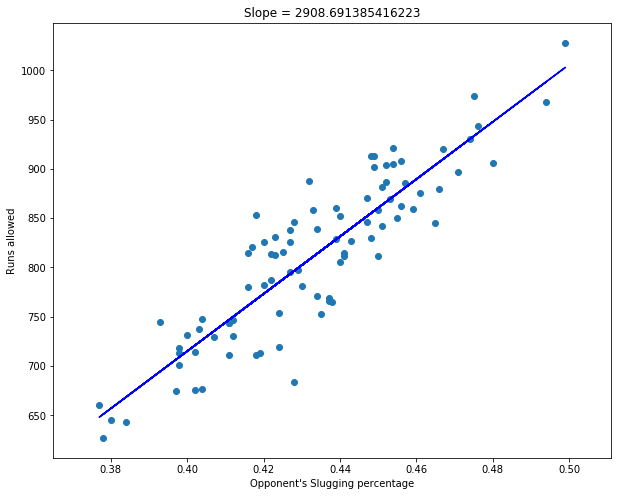

In [42]:
x = np.array(moneyballnew.OSLG)
y = np.array(moneyballnew.RA)

# Deriving slope,intercept values
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]

#Plotting the figure
plt.figure(figsize=(10,8))
plt.scatter(x, y)
plt.plot(x, abline_values, 'b')
plt.title("Slope = %s" % (slope))
plt.xlabel("Opponent's Slugging percentage")
plt.ylabel("Runs allowed")
plt.show()

In [43]:
print(np.corrcoef(moneyballnew.OOBP,moneyballnew.RA))

[[1.         0.90990783]
 [0.90990783 1.        ]]


## Model Building
We shall now build regression models in order to predict runs scored, runs allowed and wins.

The scikit-learn library in python is extremely powerful in building a vast variety of machine learning models using very few lines of code. We shall utilise this library in order to build our models.

Our first model is used to predict ‘runs scored’. Our independent variables as on-base percentage, slugging percentage, batting average.

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

In [47]:
# Extracting our variables from the dataframe.
x = moneyball[['OBP','SLG','BA']].values
y = moneyball[['RS']].values

model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
print(model.intercept_)
print(model.coef_)

[-788.45704708]
[[2917.42140821 1637.92766577 -368.96606009]]


Thus, our model is of the following form:

RS = -788.46+2917.42×(OBP)+1637.93×(SLG)-368.97×(BA)

At this point, we notice something odd. Our model has a variable with a negative coefficient a.k.a Batting Average. This is counter-intuitive as a team with a higher batting average should have more runs scored. This situation represents a phenomenon known as multi-collinearity which leads to discrepancies in multiple linear regression models.

In order to avoid multi-collinearity, we must either add an interaction variable or remove the variable causing the discrepancy. For the sake of simplicity let us remove BA from our model.

In [49]:
x = moneyball[['OBP','SLG']].values
y = moneyball[['RS']].values

# Calling our model object.
RS_model = LinearRegression()

# Fitting the model.
RS_model.fit(x,y)

# Printing model intercept and coefficients.
print(RS_model.intercept_)
print(RS_model.coef_)

RS_model.predict([[0.339,0.430]])

[-804.62706106]
[[2737.76802227 1584.90860546]]


array([[804.98699884]])

Our refined model is:

RS = -804.63+2737.77×(OBP)+1584.91×(SLG)

Similarly, we build a model for ‘runs allowed’ using opponent’s on-base percentage and opponent’s slugging percentage as independent variables:

In [54]:
# Extracting our variables from the dataframe.
x = moneyballnew[['OOBP','OSLG']].values
y = moneyballnew[['RA']].values
# Calling our model object.
RA_model = LinearRegression()
# Fitting the model.
RA_model.fit(x,y)
# Printing model intercept and coefficients.
print(RA_model.intercept_)
print(RA_model.coef_)

[-837.37788861]
[[2913.59948582 1514.28595842]]


Model for runs allowed:

RA = -837.38 + 2913.60 ×(OOBP) + 1514.29 ×(OSLG)

Lastly, our model for predicting wins from runs difference:

In [55]:
# Extracting our variables from the dataframe.
x = moneyball[['RD']].values
y = moneyball[['W']].values
# Calling our model object.
W_model = LinearRegression()
# Fitting the model.
W_model.fit(x,y)
# Printing model intercept and coefficients.
print(W_model.intercept_)
print(W_model.coef_)

[80.88137472]
[[0.10576562]]


Model for wins:

W = 80.88 + 0.11 ×(RD)

## Model Predictions

Here are the Oakland Athletics statistics in 2001 before the playoffs.

OBP: 0.339

SLG: 0.430

OOBP: 0.307

OSLG: 0.373

Lets plug in these values into the above models to generate predictions.

In [58]:
# Prediction for runs scored.
RS_model.predict([[0.339,0.430]])

array([[804.98699884]])

In [59]:
# Predictions for runs allowed.
RA_model.predict([[0.307,0.373]])

array([[621.92581602]])

Thus, our models predicted the following:

RS ≈ 805

RA ≈ 622

This implies that RD = 183.

Finally, we plug in RD into our wins model:

In [61]:
# Prediction for wins.
W_model.predict([[183]])

array([[100.23648363]])

Comparing our model results with the actual outcome and De Podesta’s estimates we get:

![image.png](attachment:image.png)

Quite remarkable isn’t it? Our model’s predictions actually turned out to be fairly accurate as compared to reality.

